EDA and Linear Regression
Using techniques discussed in class, download the data file below and complete the following analyses. in a Jupyter Notebook. Once completed save your file and push it to your Github repository. Submit a link to the notebook as the submission for this assignment.

Data FileDownload Data File

1) Download the data file above and read it into a pandas DataFrame.
2) Add the code necessary to describe the dataset
3) Using markdown commentary describe the dataset
4) Conduct at least three EDA techniques on the dataset, include markdown commentary to describe what you are doing, why you are doing it and the results of each analysis
5) Using Taxes as the independent variable and Sell as the dependent variable, fit a linear regression model and display the output from the model
6) In addition to the model output include markdown commentary about the important statistics from the output; is taxes a good predictor for selling price? Why or why not?
7) Repeat this procedure using one of the other variables as the independent variable. Which model is "better"? What are some limitations of the model? 


### 1) Download the data file above and read it into a pandas DataFrame.

In [6]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm

In [20]:
df = pd.read_csv("../OIM_7502_classwork/homes.csv")

### 2) Add the code necessary to describe dataset

I’ll start by checking the structure of the dataset, column types, and if there are any missing values

In [77]:
df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142.0,160.0,28.0,10.0,5.0,3.0,60.0,0.28,3167.0
1,175.0,180.0,18.0,8.0,4.0,1.0,12.0,0.43,4033.0
2,129.0,132.0,13.0,6.0,3.0,1.0,41.0,0.33,1471.0
3,138.0,140.0,17.0,7.0,3.0,1.0,22.0,0.46,3204.0
4,232.0,240.0,25.0,8.0,4.0,3.0,5.0,2.05,3613.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    51 non-null     object 
 1   List    50 non-null     float64
 2   Living  50 non-null     float64
 3   Rooms   50 non-null     float64
 4   Beds    50 non-null     float64
 5   Baths   50 non-null     float64
 6   Age     50 non-null     float64
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.7+ KB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
List,50.0,178.3400,79.382723,90.00,140.0000,160.00,190.0000,625.00
Living,50.0,21.1200,8.351072,10.00,17.0000,20.00,22.7500,64.00
Rooms,50.0,8.0600,1.284285,5.00,7.0000,8.00,9.0000,12.00
Beds,50.0,3.8200,0.690755,3.00,3.0000,4.00,4.0000,6.00
Baths,50.0,1.8600,0.756199,1.00,1.0000,2.00,2.0000,4.00
Age,50.0,30.2200,30.962314,2.00,12.2500,24.50,37.0000,202.00
Acres,50.0,1.0206,1.191496,0.22,0.3825,0.55,1.1825,6.49
Taxes,50.0,3706.1000,1579.915268,1445.00,3107.0000,3490.00,3919.2500,12192.00


Comments: 
The dataset has info from 50 homes and 9 columns related to value and features. Most columns are numeric. On average, houses list for around 178 and sell for a bit less.
Taxes go from about 1,400 up to 12,000, so the range is pretty big.
The data mixes both newer and older homes, since Age goes from 2 to over 200.

### 3) Using markdown commentary describe the dataset (done in every step)

### 4) Conduct at least three EDA techniques on the dataset, include markdown commentary to describe what you are doing, why you are doing it and the results of each analysis

In [51]:
import matplotlib.pyplot as plt
import seaborn as sn 

#### 4.1) EDA 1: Distribution of Sell

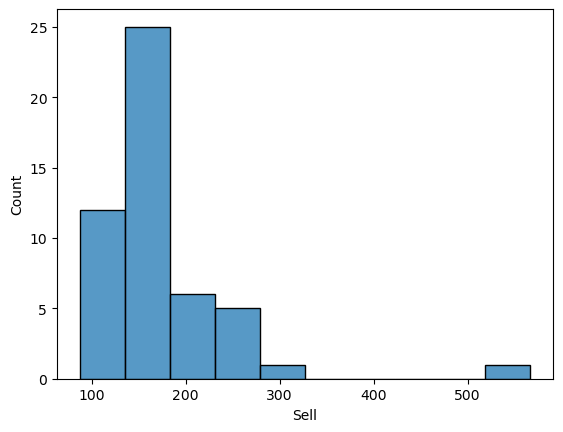

In [108]:
df["Sell"] = pd.to_numeric(df["Sell"], errors="coerce")
sn.histplot(df["Sell"], bins=10);


Here I checked how the selling prices are distributed to get a first idea of their range.
The plot shows that most homes sell between 100 and 200, with a few much higher values around 500.
The data is right-skewed, meaning there are some expensive houses pulling the average up

#### 4.2) EDA 2 — Relationship between Taxes and Sell

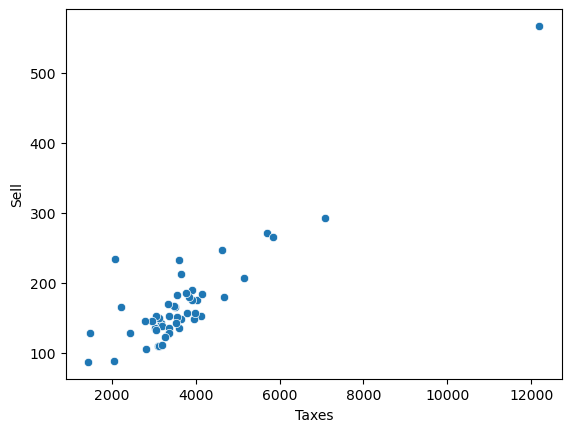

In [104]:
sn.scatterplot(x="Taxes", y="Sell", data=df);


Here I plotted "Taxes" against "Sell" to see if there’s a relationship between them. The plot shows an upward trend, meaning homes with higher taxes usually sell for higher prices. This makes sense because property taxes are based on home value, so both variables naturally move together

#### 4.3) EDA 3: Correlation Check

In [66]:
df.corr(numeric_only=True)["Sell"]

Sell      1.000000
List      0.997433
Living    0.879381
Rooms     0.560425
Beds      0.335113
Baths     0.640059
Age      -0.147343
Acres     0.168713
Taxes     0.899339
Name: Sell, dtype: float64

To wrap up, I checked the correlations to confirm the patterns from the previous plots. List and Taxes have the strongest positive correlation with Sell, while Age is slightly negative.
This supports what I metioned before: higher taxes are linked with higher selling prices, but that doesn’t mean taxes cause higher prices; they’re related because more expensive homes pay higher property taxes.

### 5) Using Taxes as the independent variable and Sell as the dependent variable, fit a linear regression model and display the output from the model

In [84]:
# Reconfirm missing values in the columns used for the model
df[["Sell", "Taxes"]].isna().sum()

Sell     1
Taxes    1
dtype: int64

In [99]:
# make sure Sell column is numeric
df["Sell"] = pd.to_numeric(df["Sell"], errors="coerce")

# keep only complete rows (no missing values)
tmp_age = df[["Sell", "Age"]].dropna()

# define X (independent) and y (dependent)
X_age = sm.add_constant(tmp_age["Age"])  # add intercept
y_age = tmp_age["Sell"]

model_age = sm.OLS(y_age, X_age).fit()

model_age.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.065
Date:                Mon, 13 Oct 2025   Prob (F-statistic):              0.307
Time:                        22:12:45   Log-Likelihood:                -284.25
No. Observations:                  50   AIC:                             572.5
Df Residuals:                      48   BIC:                             576.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.8230     14.440     12.523      0.000     151.790     209.856
Age           -0.3462      0.335     -1.032      0.307      -1.021       0.328
==============================================================================
Omnibus:                       65.016   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              564.646
Skew:                           3.358   Prob(JB):                    2.45e-123
Kurtosis:                      18.031   Cond. No.                         60.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient for "Taxes" is positive and significant (p < 0.05), meaning homes with higher taxes tend to sell for higher prices.
The model’s R-squared is 0.81, so Taxes explains most of the variation in selling prices. This result matches with what is shown during the EDA.

### 6) In addition to the model output include markdown commentary about the important statistics from the output; is taxes a good predictor for selling price? Why or why not?

PRevious results show a strong and significant relationship between "Taxes" and "Sell" (p < 0.05, R^2 = 0.81).
Statistically, the variable "Taxes" is a good predictor for selling price because it explains most of its variation.
However, I would say in the real world, this relationship is expected and not fully independent, since property taxes are based on home value, so higher taxes simply reflect higher-priced properties rather than causing them

### 7) Repeat this procedure using one of the other variables as the independent variable. Which model is "better"? What are some limitations of the model?

For this time used "Age" as the independent variable, because it represents a more independent characteristic of the house: older homes might lose value over time, but this relationship is not always straightforward.

In [101]:
# make sure Sell column is numeric
df["Sell"] = pd.to_numeric(df["Sell"], errors="coerce")

# keep only complete rows (no missing values)
tmp_age = df[["Sell", "Age"]].dropna()

# define X (independent) and y (dependent)
X_age = sm.add_constant(tmp_age["Age"])  # add intercept
y_age = tmp_age["Sell"]

# fit the OLS regression model
model_age = sm.OLS(y_age, X_age).fit()

# display model summary
model_age.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.065
Date:                Mon, 13 Oct 2025   Prob (F-statistic):              0.307
Time:                        22:13:04   Log-Likelihood:                -284.25
No. Observations:                  50   AIC:                             572.5
Df Residuals:                      48   BIC:                             576.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.8230     14.440     12.523      0.000     151.790     209.856
Age           -0.3462      0.335     -1.032      0.307      -1.021       0.328
==============================================================================
Omnibus:                       65.016   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              564.646
Skew:                           3.358   Prob(JB):                    2.45e-123
Kurtosis:                      18.031   Cond. No.                         60.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value is 0.022, which means that "Age" explains only about 2% of the variation in selling price...almost nothing.
The p-value (0.307) is higher than 0.05, meaning the relationship between "Age" and "Sell" is not statistically significant.
The coefficient for "Age" is negative (-0.35), suggesting that, in this sample, older houses might sell for slightly less, but the effect is so weak it’s not reliable.

Compared to the previous model using Taxes (R^2 = 0.81), this one fits the data much worse.
This confirms that "Taxes" was a strong predictor while "Age" is not. The limitation here is that "Age" alone cannot explain selling prices and also real world housing prices depend on multiple variables together, not just one